In [104]:
#데이터 로드
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

file_path = "./titanic.csv"
df = pd.read_csv(file_path) 

In [106]:
#결측치 확인
missing_values = df.isnull().sum()
print(missing_values)

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [108]:
#결측치 제거 (Age인 경우 평균나이로)

#평균값(나이)
print(df['Age'].isnull().sum())

# 'Age' 컬럼의 결측치 평균값으로 채우기
mean_age = df['Age'].mean()
df['Age'] = df['Age'].fillna(age_mean)

177


survived
0    549
1    342
Name: count, dtype: int64
survived
0    61.616162
1    38.383838
Name: proportion, dtype: float64


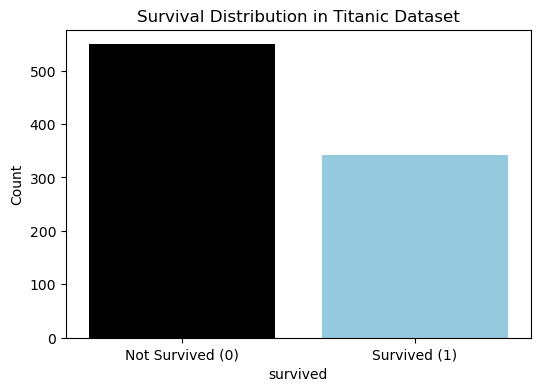

In [110]:
import seaborn as sns
import matplotlib.pyplot as plt

# Titanic 데이터셋 로드 (Seaborn 제공)
titanic = sns.load_dataset('titanic')

# 생존 여부(Survived) 분포 확인
survival_counts = titanic['survived'].value_counts()
print(survival_counts)

# 퍼센트 비율 확인
survival_ratio = titanic['survived'].value_counts(normalize=True) * 100
print(survival_ratio)

# 시각화
plt.figure(figsize=(6,4))
sns.barplot(x=survival_counts.index, y=survival_counts.values, 
            palette=['black', 'skyblue'], hue=survival_counts.index, legend=False)
plt.xticks(ticks=[0, 1], labels=['Not Survived (0)', 'Survived (1)'])
plt.ylabel('Count')
plt.title('Survival Distribution in Titanic Dataset')
plt.show()

In [112]:
# 삭제할 컬럼 리스트
columns_to_delete = ['Ticket', 'Fare', 'Embarked', 'Name']

# 컬럼 삭제
df = df.drop(columns=columns_to_delete)

In [114]:
# 변경된 데이터 확인
print(df.head())

   PassengerId  Survived  Pclass     Sex   Age  SibSp  Parch Cabin
0            1         0       3    male  22.0      1      0   NaN
1            2         1       1  female  38.0      1      0   C85
2            3         1       3  female  26.0      0      0   NaN
3            4         1       1  female  35.0      1      0  C123
4            5         0       3    male  35.0      0      0   NaN


In [116]:
# LabelEncoder 초기화

label_encoder = LabelEncoder()

# 특정 컬럼만 인코딩

columns_to_encode = ['Sex', 'Cabin']  

for column in columns_to_encode:

    df[column] = label_encoder.fit_transform(df[column])

print(df)

     PassengerId  Survived  Pclass  Sex        Age  SibSp  Parch  Cabin
0              1         0       3    1  22.000000      1      0    147
1              2         1       1    0  38.000000      1      0     81
2              3         1       3    0  26.000000      0      0    147
3              4         1       1    0  35.000000      1      0     55
4              5         0       3    1  35.000000      0      0    147
..           ...       ...     ...  ...        ...    ...    ...    ...
886          887         0       2    1  27.000000      0      0    147
887          888         1       1    0  19.000000      0      0     30
888          889         0       3    0  29.699118      1      2    147
889          890         1       1    1  26.000000      0      0     60
890          891         0       3    1  32.000000      0      0    147

[891 rows x 8 columns]


In [118]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# 데이터셋
data = {
    'survived': [0, 1, 1, 1, 0],
    'pclass': [3, 1, 3, 1, 3],
    'sex': ['male', 'female', 'female', 'female', 'male'],
    'age': [22.0, 38.0, 26.0, 35.0, 35.0],
    'sibsp': [1, 1, 0, 1, 0],
    'parch': [0, 0, 0, 0, 0],
    'class': ['Third', 'First', 'Third', 'First', 'Third']
}

df = pd.DataFrame(data)

In [120]:
# 특성(X)과 타겟(y) 데이터 정의
X = df.drop(columns=['survived'])  # 'survived'는 예측할 값이므로 제외
y = df['survived']  # 타겟 값 'survived'

In [122]:
# 범주형 데이터를 수치형 데이터로 변환 (Label Encoding)
X['sex'] = X['sex'].map({'male': 0, 'female': 1})
X['class'] = X['class'].map({'First': 0, 'Second': 1, 'Third': 2})

In [124]:
# 데이터셋을 학습용(train)과 테스트용(test)으로 분리 (6:4 비율)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [126]:
# 분류 모델 리스트
models = {
    "Random Forest": RandomForestClassifier(max_depth = 5, random_state=42),
    "Decision Tree": DecisionTreeClassifier(max_depth = 3, random_state=42),
    "K-Nearest Neighbors": KNeighborsClassifier(n_neighbors=3),
    "Support Vector Machine": SVC(random_state=42),
    "Logistic Regression": LogisticRegression(max_iter=200, random_state=42)
}

Evaluating Random Forest:
Accuracy: 0.5000


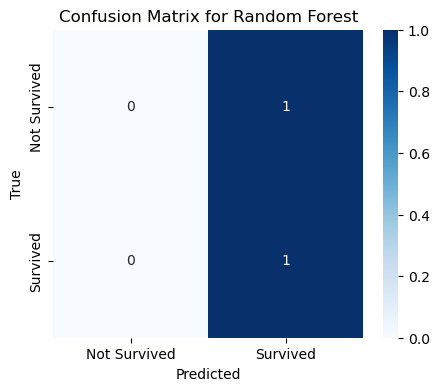

Evaluating Decision Tree:
Accuracy: 1.0000


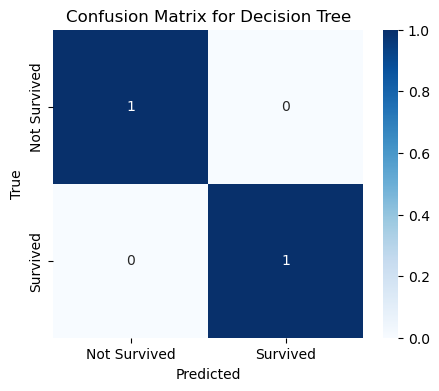

Evaluating K-Nearest Neighbors:
Accuracy: 0.5000


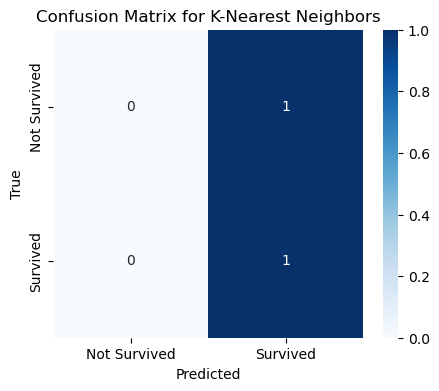

Evaluating Support Vector Machine:
Accuracy: 0.5000


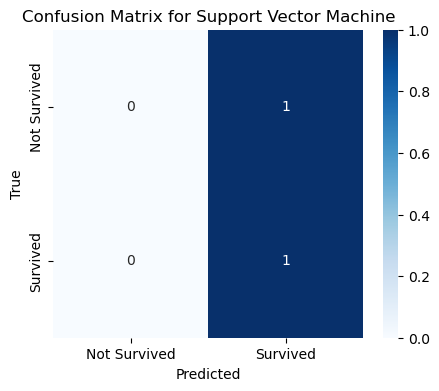

Evaluating Logistic Regression:
Accuracy: 0.5000


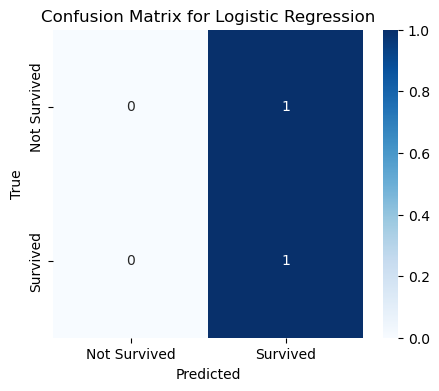

In [128]:
# 모델 학습 및 평가
for model_name, model in models.items():
    print(f"Evaluating {model_name}:")
    
    # 모델 학습
    model.fit(X_train, y_train)
    
    # 예측
    y_pred = model.predict(X_test)
    
    # 정확도 평가
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {accuracy:.4f}")

# Confusion Matrix
    cm = confusion_matrix(y_test, y_pred, labels=[0, 1])
    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Survived', 'Survived'], yticklabels=['Not Survived', 'Survived'])
    plt.title(f"Confusion Matrix for {model_name}")
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()